In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel("DAGs Data New.xlsx", index_col = [31, 40])
data.rename(columns={key: str(key).replace("_", " ").title() for key in data}, inplace= True)
data["General Outcome"][data["Environmental Outcome"]==1]=1
data["General Outcome"][data["Health Outcome"]==1]=1
keys = list(data.keys())
#list(data.keys())

/Users/kodjobarnor/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/Users/kodjobarnor/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [3]:
rename_vars = ["Public", "Private", "University"]

data.rename(columns = {col:col + " Funding" for col in rename_vars}, inplace = True)

In [4]:
years = keys[-31:]
countries = keys[-82:-31]
data.rename(columns = {year:str(year) for year in years}, inplace = True)
years = [str(year) for year in years]
data

Unnamed: 0  \
Loc_experiment YearP               
ARGENTINA      2012           60   
               2007          130   
               2016          162   
               2020          183   
               2018          208   
...                          ...   
USA            2005          445   
               2020          471   
               2019          487   
               2018          491   
               2019          492   

                                                          Article Title  \
Loc_experiment YearP                                                      
ARGENTINA      2012   Glyphosate-based Herbicide - a Genotoxic but n...   
               2007   Microbial Respiration in Soils of the Argentin...   
               2016   Survival, Reproduction, Avoidance Behavior and...   
               2020   Glyphosate and AMPA concentrations in the resp...   
               2018   Determination of glyphosate, AMPA and glufosin...   
...                                                                 ...   
USA            2005   Sublethal Effects of the Herbicide Glyphosate ...   
               2020   Assessment of lethal and sublethal effects of ...   
               2019   Developmental and epigenetic effects of Roundu...   
               2018   Glyphosate perturbs the gut microbiota of hone...   
               2019   Assessment of Glyphosate Induced Epigenetic Tr...   

                                                           Article Link  \
Loc_experiment YearP                                                      
ARGENTINA      2012   https://www.ejso.com/article/S0748-7983(12)006...   
               2007         http://dx.doi.org/10.1080/00103620701826506   
               2016   https://link.springer.com/article/10.1007%2Fs0...   
               2020      https://doi.org/10.1016/j.geoderma.2020.114334   
               2018     https://doi.org/10.1016/j.scitotenv.2018.06.340   
...                                                                 ...   
USA            2005                       DOI:10.1007/s00128-005-0771-3   
               2020        https://doi.org/10.1016/j.ecoenv.2020.111108   
               2019       https://doi.org/10.1016/j.aquatox.2019.03.005   
               2018             https://doi.org/10.1073/pnas.1803880115   
               2019   https://www.nature.com/articles/s41598-019-428...   

                      General Outcome  General Outcome (1,0)  \
Loc_experiment YearP                                           
ARGENTINA      2012                 0                      0   
               2007                 0                      0   
               2016                 0                      0   
               2020                 1                      1   
               2018                 0                      0   
...                               ...                    ...   
USA            2005                 1                      1   
               2020                 1                      1   
               2019                 1                      1   
               2018                 1                      1   
               2019                 1                      1   

                                                   Desc General Outcome  \
Loc_experiment YearP                                                      
ARGENTINA      2012                        Not an epigenetic carcinogen   
               2007   The addition of low rates of GLY (1.5 and 15 m...   
               2016   These results indicate that environmentally re...   
               2020                            Found in respirable dust   
               2018   the values found in our study, low levels were...   
...                                                                 ...   
USA            2005   Low concentration of glyphosate significantly ...   
               2020   chronic exposure to glyphosate may affect poll...   
               201

  0%|          | 0/1 [00:00<?, ?it/s]

{('GenOut', 'PriAff'): '-0.21***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriFun', 'PriAff'): '0.27***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriFun', 'PriAff'): '0.27***'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('GenOut', 'PriAff'): '-0.21***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriFun', 'PriAff'): '0.27***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriFun', 'PriAff'): '0.27***'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('GenOut', 'PriAff'): '-0.21***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriFun', 'PriAff'): '0.27***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriFun', 'PriAff'): '0.27***'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('GenOut', 'PriAff'): '-0.21***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('PriFun', 'PriAff'): '0.27***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('PriFun', 'PriAff'): '0.27***'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('GenOut', 'PriAff'): '-0.21***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('PriFun', 'PriAff'): '0.27***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('PriFun', 'PriAff'): '0.27***'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('GenOut', 'PriAff'): '-0.21***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('PriFun', 'PriAff'): '0.27***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('PriFun', 'PriAff'): '0.27***'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('GenOut', 'PriAff'): '-0.21***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('PriFun', 'PriAff'): '0.27***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('PriFun', 'PriAff'): '0.27***'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('GenOut', 'PriAff'): '-0.21***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('PriFun', 'PriAff'): '0.27***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('PriFun', 'PriAff'): '0.27***'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('GenOut', 'PriAff'): '-0.21***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('PriFun', 'PriAff'): '0.27***'}
{('GenOut', 'PriAff'): '-0.21***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('PriFun', 'PriAff'): '0.27***'}


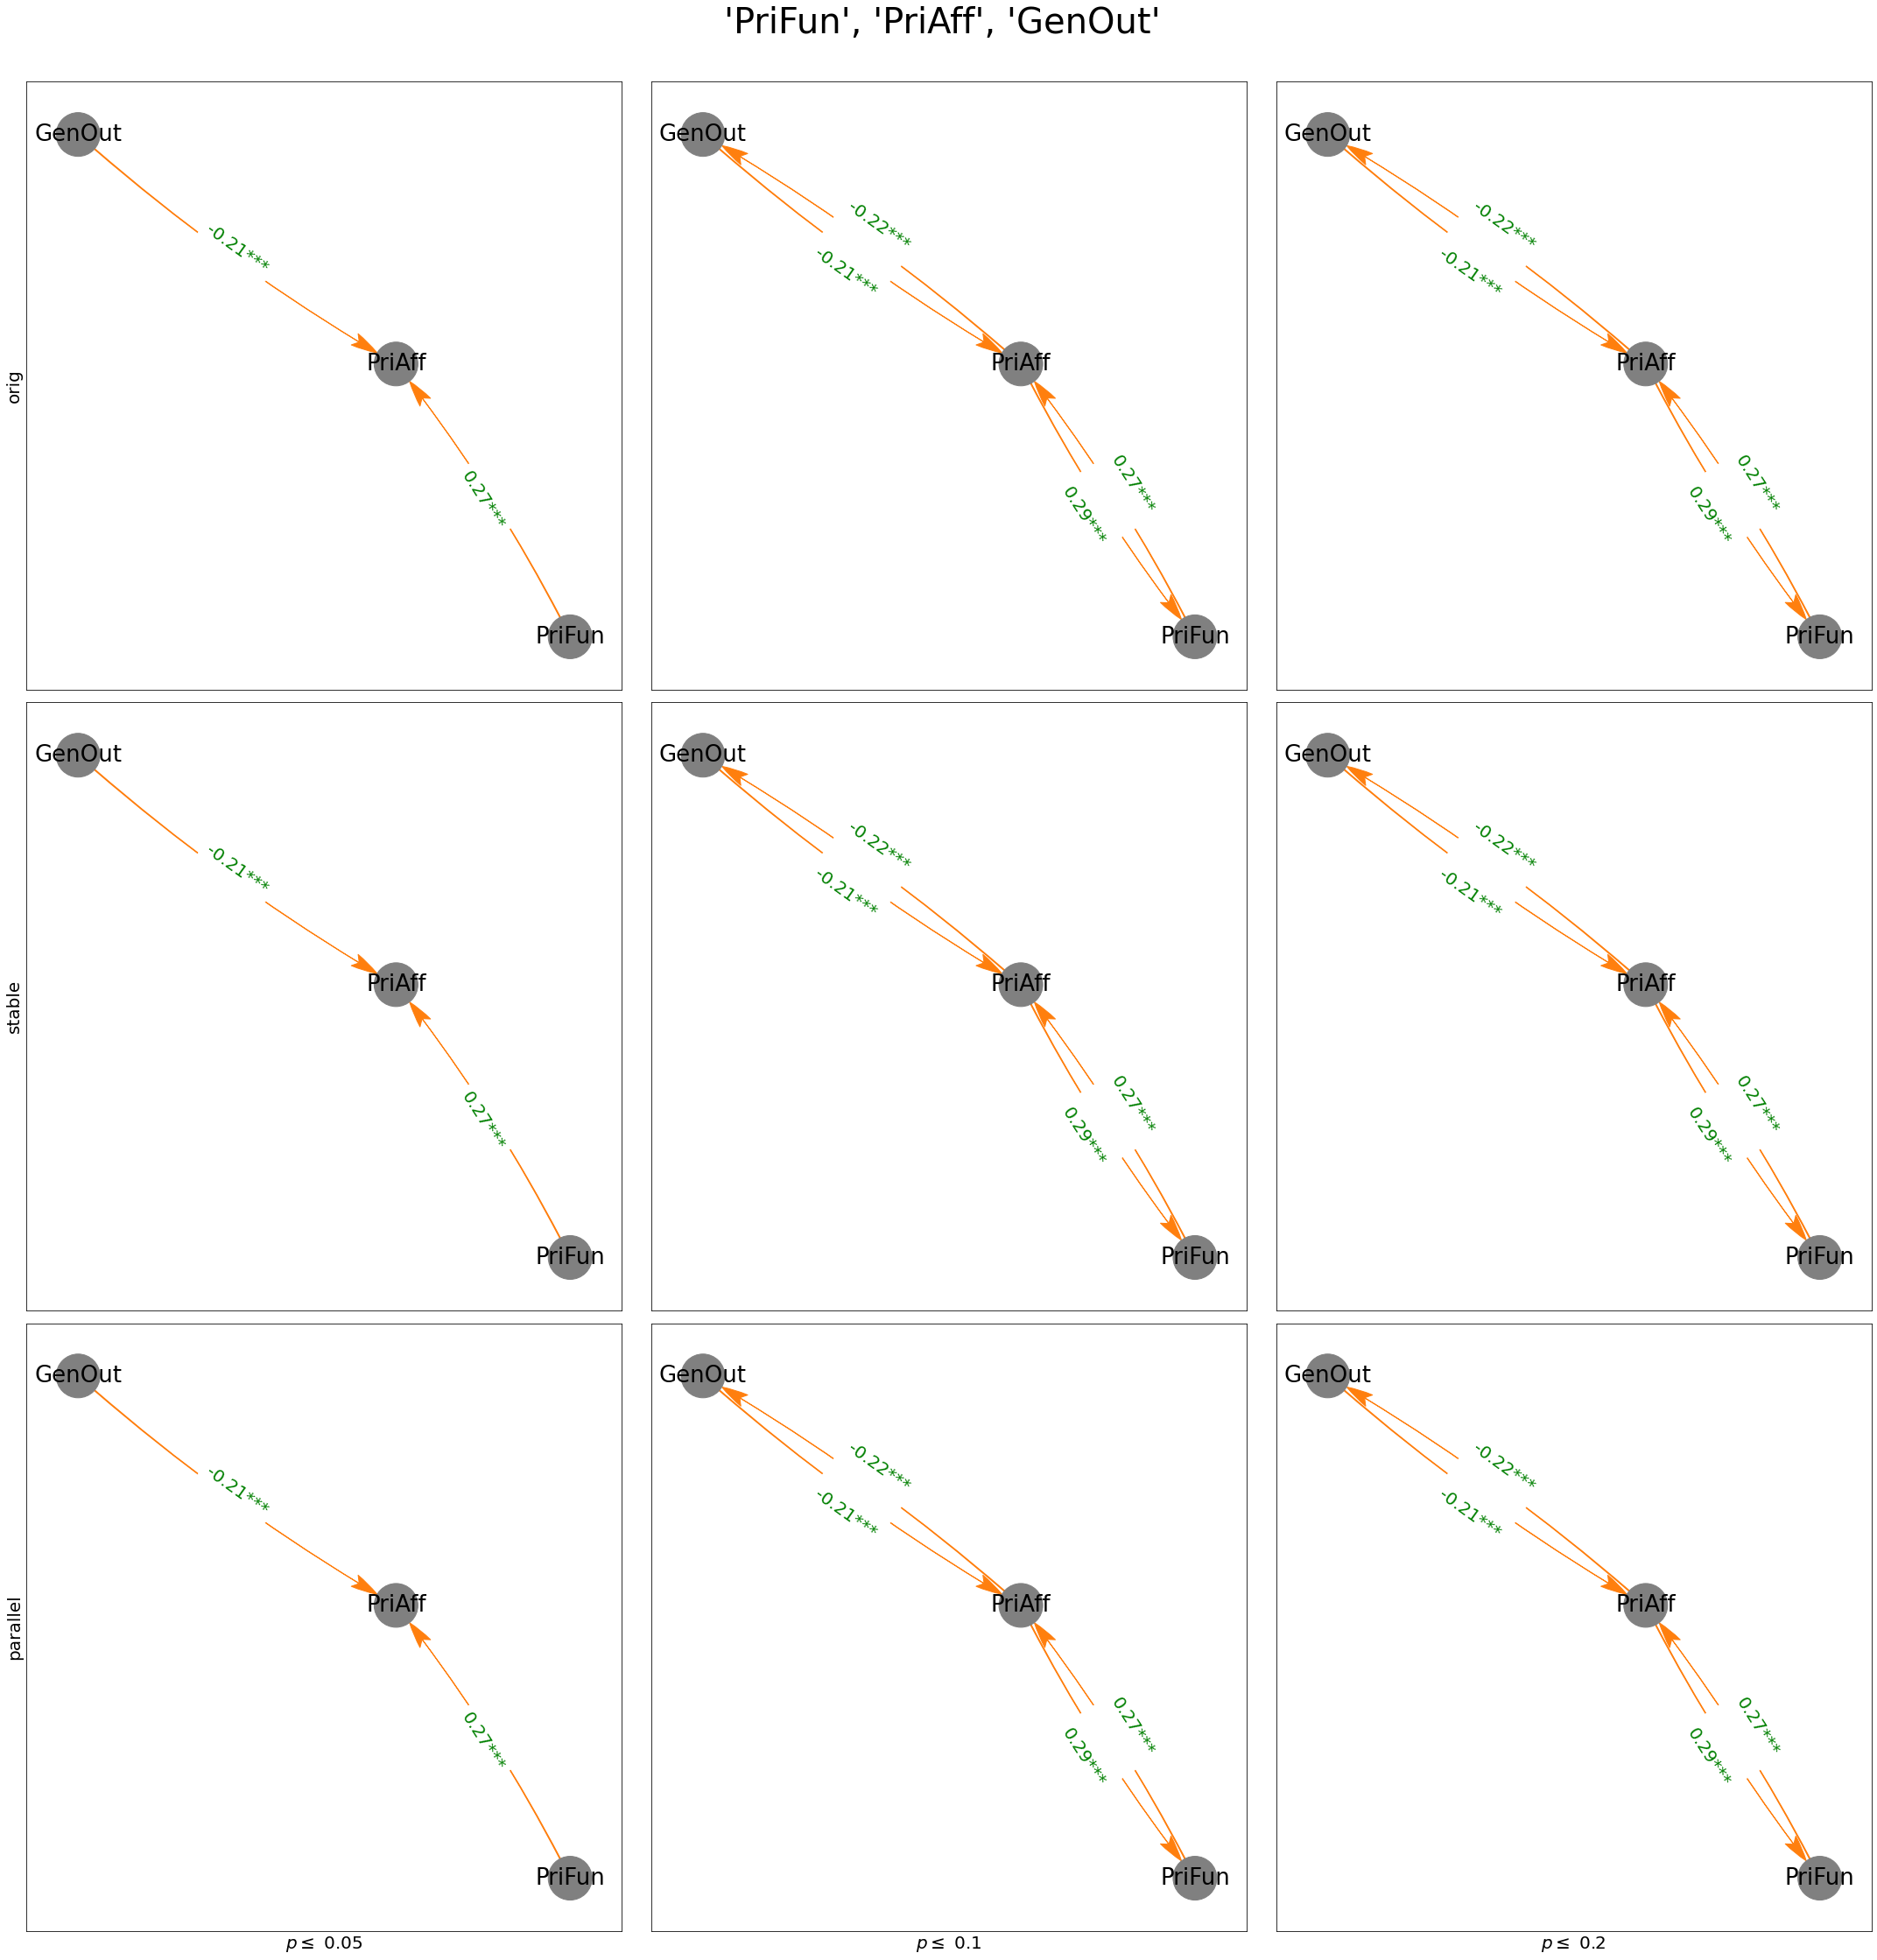

  0%|          | 0/1 [00:00<?, ?it/s]

{('GenOut', 'PubAff'): '-0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**', ('PubFun', 'PubAff'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**', ('PubFun', 'PubAff'): '0.12**'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('GenOut', 'PubAff'): '-0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**', ('PubFun', 'PubAff'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**', ('PubFun', 'PubAff'): '0.12**'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('GenOut', 'PubAff'): '-0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**', ('PubFun', 'PubAff'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**', ('PubFun', 'PubAff'): '0.12**'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('GenOut', 'PubAff'): '-0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**', ('PubFun', 'PubAff'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**', ('PubFun', 'PubAff'): '0.12**'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('GenOut', 'PubAff'): '-0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**', ('PubFun', 'PubAff'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**', ('PubFun', 'PubAff'): '0.12**'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('GenOut', 'PubAff'): '-0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**', ('PubFun', 'PubAff'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**', ('PubFun', 'PubAff'): '0.12**'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('GenOut', 'PubAff'): '-0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**', ('PubFun', 'PubAff'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**', ('PubFun', 'PubAff'): '0.12**'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('GenOut', 'PubAff'): '-0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**', ('PubFun', 'PubAff'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**', ('PubFun', 'PubAff'): '0.12**'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('GenOut', 'PubAff'): '-0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**', ('PubFun', 'PubAff'): '0.12**'}
{('GenOut', 'PubAff'): '-0.12**', ('GenOut', 'PubFun'): '0.12**', ('PubAff', 'GenOut'): '-0.12**', ('PubAff', 'PubFun'): '0.12**', ('PubFun', 'GenOut'): '0.12**', ('PubFun', 'PubAff'): '0.12**'}


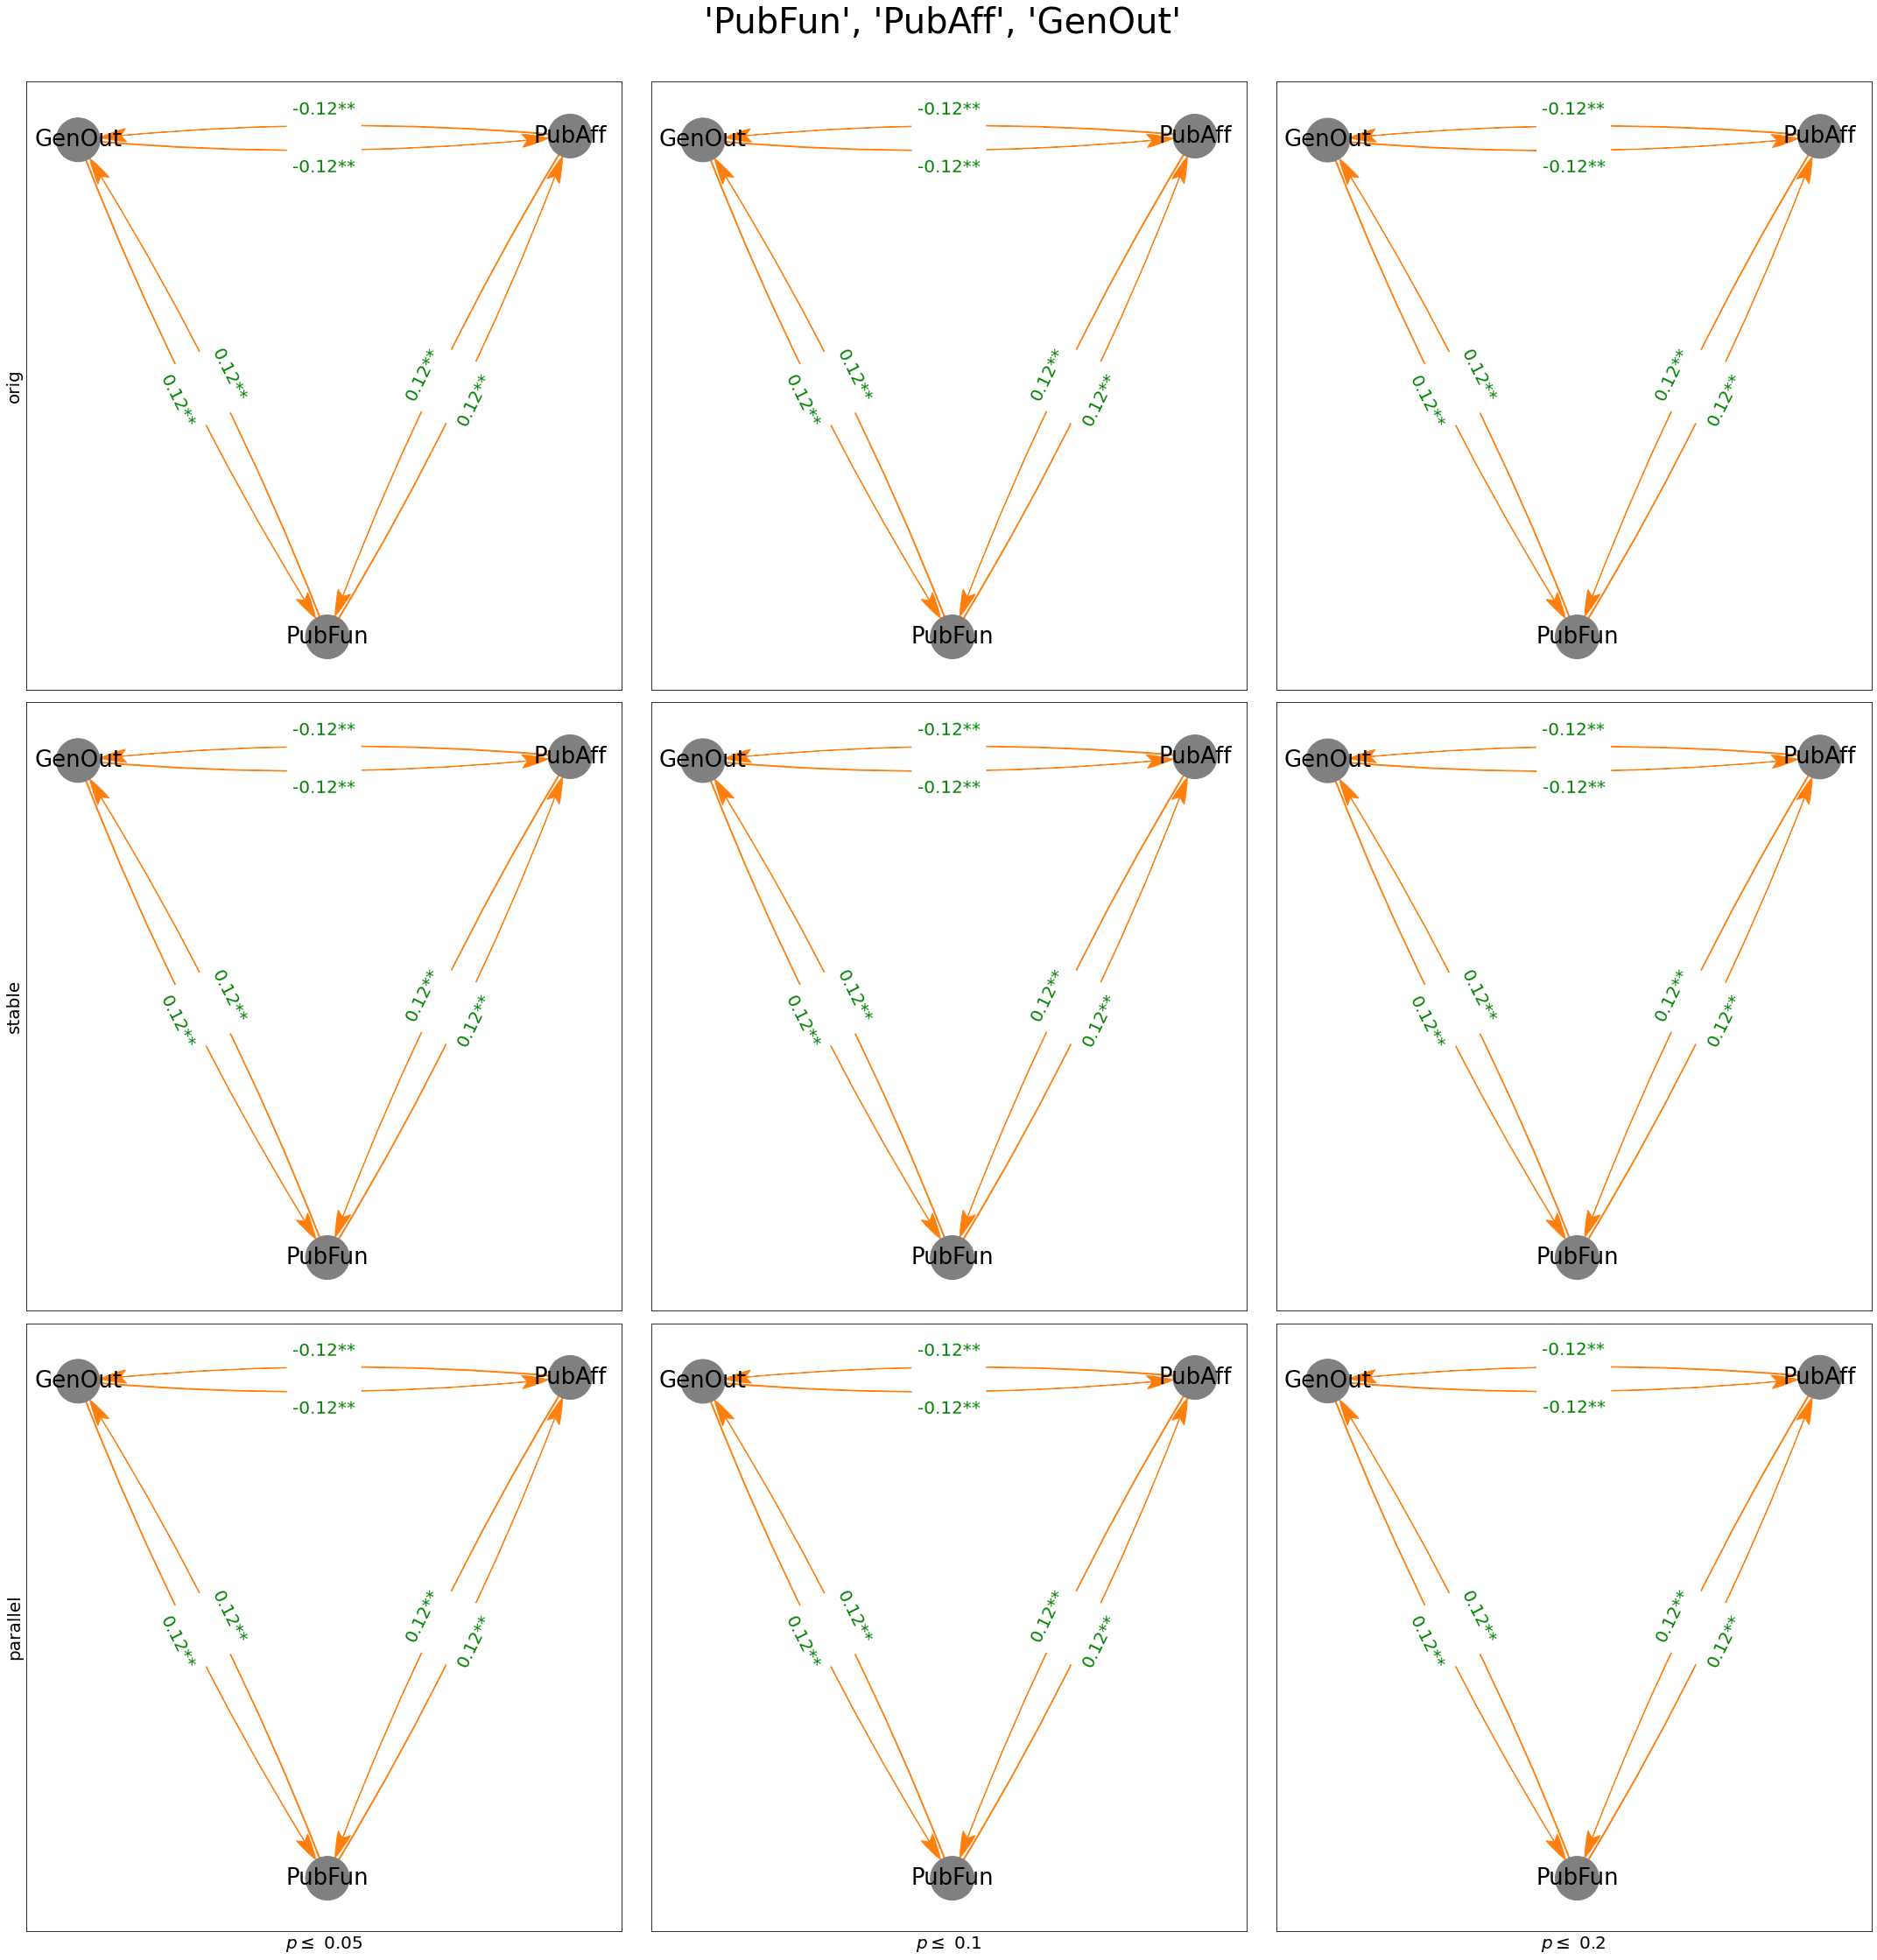

  0%|          | 0/1 [00:00<?, ?it/s]

{('UniFun', 'UniAff'): '0.15***'}
{('UniFun', 'UniAff'): '0.15***', ('GenOut', 'UniAff'): '0.16***'}
{('UniFun', 'UniAff'): '0.15***', ('GenOut', 'UniAff'): '0.16***'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('UniFun', 'UniAff'): '0.15***'}
{('UniFun', 'UniAff'): '0.15***', ('GenOut', 'UniAff'): '0.16***'}
{('UniFun', 'UniAff'): '0.15***', ('GenOut', 'UniAff'): '0.16***'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('UniFun', 'UniAff'): '0.15***'}
{('UniFun', 'UniAff'): '0.15***', ('GenOut', 'UniAff'): '0.16***'}
{('UniFun', 'UniAff'): '0.15***', ('GenOut', 'UniAff'): '0.16***'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('UniFun', 'UniAff'): '0.15***'}
{('UniFun', 'UniAff'): '0.15***', ('GenOut', 'UniAff'): '0.16***'}
{('UniFun', 'UniAff'): '0.15***', ('GenOut', 'UniAff'): '0.16***'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('UniFun', 'UniAff'): '0.15***'}
{('UniFun', 'UniAff'): '0.15***', ('GenOut', 'UniAff'): '0.16***'}
{('UniFun', 'UniAff'): '0.15***', ('GenOut', 'UniAff'): '0.16***'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('UniFun', 'UniAff'): '0.15***'}
{('UniFun', 'UniAff'): '0.15***', ('GenOut', 'UniAff'): '0.16***'}
{('UniFun', 'UniAff'): '0.15***', ('GenOut', 'UniAff'): '0.16***'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('UniAff', 'GenOut'): '0.17***'}
{('UniAff', 'GenOut'): '0.17***', ('UniAff', 'UniFun'): '0.16***'}
{('UniAff', 'GenOut'): '0.17***', ('UniAff', 'UniFun'): '0.16***', ('GenOut', 'UniAff'): '0.16***'}
{('UniAff', 'GenOut'): '0.17***', ('UniAff', 'UniFun'): '0.16***', ('GenOut', 'UniAff'): '0.16***', ('UniFun', 'UniAff'): '0.15***'}
{('UniAff', 'GenOut'): '0.17***', ('UniAff', 'UniFun'): '0.16***', ('GenOut', 'UniAff'): '0.16***', ('UniFun', 'UniAff'): '0.15***'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('UniAff', 'GenOut'): '0.17***'}
{('UniAff', 'GenOut'): '0.17***', ('UniAff', 'UniFun'): '0.16***'}
{('UniAff', 'GenOut'): '0.17***', ('UniAff', 'UniFun'): '0.16***', ('GenOut', 'UniAff'): '0.16***'}
{('UniAff', 'GenOut'): '0.17***', ('UniAff', 'UniFun'): '0.16***', ('GenOut', 'UniAff'): '0.16***', ('UniFun', 'UniAff'): '0.15***'}
{('UniAff', 'GenOut'): '0.17***', ('UniAff', 'UniFun'): '0.16***', ('GenOut', 'UniAff'): '0.16***', ('UniFun', 'UniAff'): '0.15***'}


  0%|          | 0/1 [00:00<?, ?it/s]

{('UniAff', 'GenOut'): '0.17***'}
{('UniAff', 'GenOut'): '0.17***', ('UniAff', 'UniFun'): '0.16***'}
{('UniAff', 'GenOut'): '0.17***', ('UniAff', 'UniFun'): '0.16***', ('GenOut', 'UniAff'): '0.16***'}
{('UniAff', 'GenOut'): '0.17***', ('UniAff', 'UniFun'): '0.16***', ('GenOut', 'UniAff'): '0.16***', ('UniFun', 'UniAff'): '0.15***'}
{('UniAff', 'GenOut'): '0.17***', ('UniAff', 'UniFun'): '0.16***', ('GenOut', 'UniAff'): '0.16***', ('UniFun', 'UniAff'): '0.15***'}


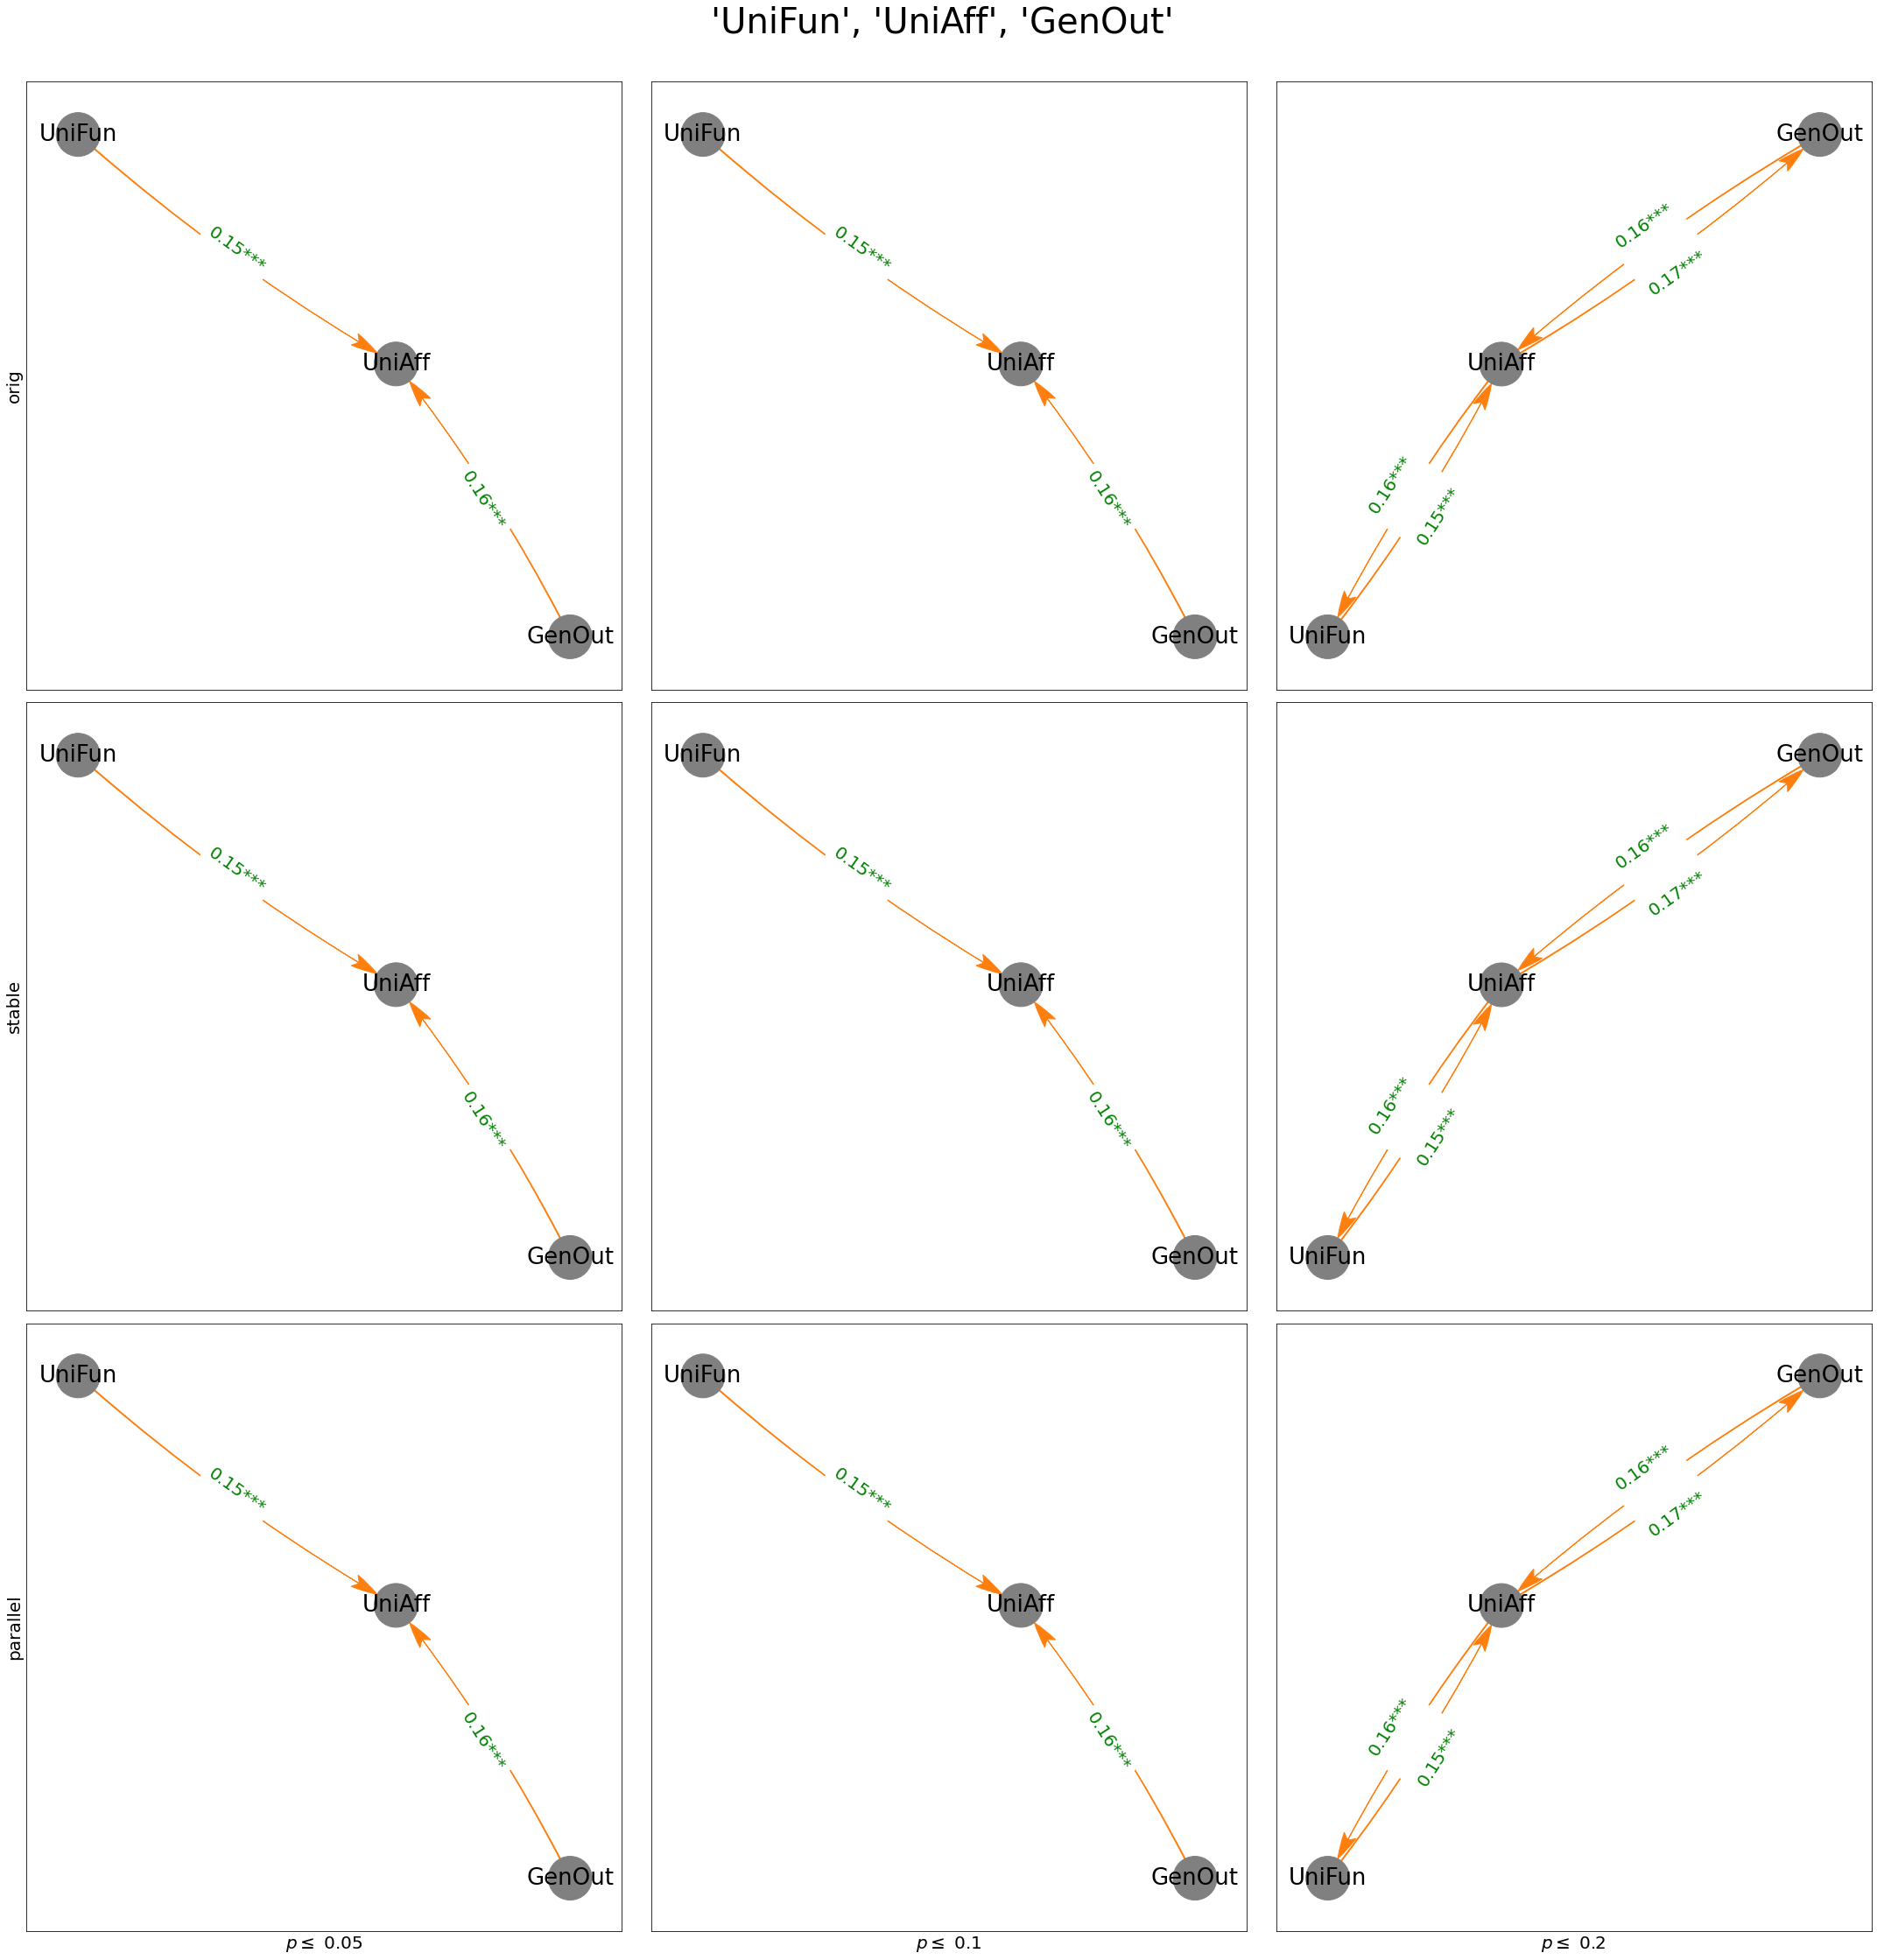

  0%|          | 0/2 [00:00<?, ?it/s]

{('PriFun', 'UniFun'): '-0.15***'}
{('PriFun', 'UniFun'): '-0.15***', ('UniFun', 'PriFun'): '-0.15***'}
{('PriFun', 'UniFun'): '-0.15***', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PubFun'): '0.11*'}
{('PriFun', 'UniFun'): '-0.15***', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PubFun'): '0.11*', ('PubFun', 'GenOut'): '0.11*'}
{('PriFun', 'UniFun'): '-0.15***', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PubFun'): '0.11*', ('PubFun', 'GenOut'): '0.11*'}


  0%|          | 0/2 [00:00<?, ?it/s]

{('PriFun', 'UniFun'): '-0.15***'}
{('PriFun', 'UniFun'): '-0.15***', ('UniFun', 'PriFun'): '-0.15***'}
{('PriFun', 'UniFun'): '-0.15***', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PubFun'): '0.11*'}
{('PriFun', 'UniFun'): '-0.15***', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PubFun'): '0.11*', ('PubFun', 'GenOut'): '0.11*'}
{('PriFun', 'UniFun'): '-0.15***', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PubFun'): '0.11*', ('PubFun', 'GenOut'): '0.11*'}


  0%|          | 0/2 [00:00<?, ?it/s]

{('PriFun', 'UniFun'): '-0.15***'}
{('PriFun', 'UniFun'): '-0.15***', ('UniFun', 'PriFun'): '-0.15***'}
{('PriFun', 'UniFun'): '-0.15***', ('UniFun', 'PriFun'): '-0.15***'}


  0%|          | 0/2 [00:00<?, ?it/s]

{('PubFun', 'PriFun'): '-0.12**'}
{('PubFun', 'PriFun'): '-0.12**', ('PubFun', 'GenOut'): '0.11*'}
{('PubFun', 'PriFun'): '-0.12**', ('PubFun', 'GenOut'): '0.11*', ('UniFun', 'PriFun'): '-0.15***'}
{('PubFun', 'PriFun'): '-0.12**', ('PubFun', 'GenOut'): '0.11*', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PubFun'): '0.11*'}
{('PubFun', 'PriFun'): '-0.12**', ('PubFun', 'GenOut'): '0.11*', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PubFun'): '0.11*'}


  0%|          | 0/2 [00:00<?, ?it/s]

{('PubFun', 'PriFun'): '-0.12**'}
{('PubFun', 'PriFun'): '-0.12**', ('PubFun', 'GenOut'): '0.11*'}
{('PubFun', 'PriFun'): '-0.12**', ('PubFun', 'GenOut'): '0.11*', ('UniFun', 'PriFun'): '-0.15***'}
{('PubFun', 'PriFun'): '-0.12**', ('PubFun', 'GenOut'): '0.11*', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PubFun'): '0.11*'}
{('PubFun', 'PriFun'): '-0.12**', ('PubFun', 'GenOut'): '0.11*', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PubFun'): '0.11*'}


  0%|          | 0/2 [00:00<?, ?it/s]

{('PubFun', 'PriFun'): '-0.12**'}
{('PubFun', 'PriFun'): '-0.12**', ('PubFun', 'GenOut'): '0.11*'}
{('PubFun', 'PriFun'): '-0.12**', ('PubFun', 'GenOut'): '0.11*', ('UniFun', 'PriFun'): '-0.15***'}
{('PubFun', 'PriFun'): '-0.12**', ('PubFun', 'GenOut'): '0.11*', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PubFun'): '0.11*'}
{('PubFun', 'PriFun'): '-0.12**', ('PubFun', 'GenOut'): '0.11*', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PubFun'): '0.11*'}


  0%|          | 0/2 [00:00<?, ?it/s]

{('UniFun', 'GenOut'): '0.08'}
{('UniFun', 'GenOut'): '0.08', ('UniFun', 'PriFun'): '-0.15***'}
{('UniFun', 'GenOut'): '0.08', ('UniFun', 'PriFun'): '-0.15***', ('PubFun', 'GenOut'): '0.11*'}
{('UniFun', 'GenOut'): '0.08', ('UniFun', 'PriFun'): '-0.15***', ('PubFun', 'GenOut'): '0.11*', ('PubFun', 'PriFun'): '-0.12**'}
{('UniFun', 'GenOut'): '0.08', ('UniFun', 'PriFun'): '-0.15***', ('PubFun', 'GenOut'): '0.11*', ('PubFun', 'PriFun'): '-0.12**'}


  0%|          | 0/2 [00:00<?, ?it/s]

{('UniFun', 'GenOut'): '0.08'}
{('UniFun', 'GenOut'): '0.08', ('UniFun', 'PriFun'): '-0.15***'}
{('UniFun', 'GenOut'): '0.08', ('UniFun', 'PriFun'): '-0.15***', ('PubFun', 'GenOut'): '0.11*'}
{('UniFun', 'GenOut'): '0.08', ('UniFun', 'PriFun'): '-0.15***', ('PubFun', 'GenOut'): '0.11*', ('PubFun', 'PriFun'): '-0.12**'}
{('UniFun', 'GenOut'): '0.08', ('UniFun', 'PriFun'): '-0.15***', ('PubFun', 'GenOut'): '0.11*', ('PubFun', 'PriFun'): '-0.12**'}


  0%|          | 0/2 [00:00<?, ?it/s]

{('UniFun', 'GenOut'): '0.08'}
{('UniFun', 'GenOut'): '0.08', ('UniFun', 'PriFun'): '-0.15***'}
{('UniFun', 'GenOut'): '0.08', ('UniFun', 'PriFun'): '-0.15***', ('PubFun', 'GenOut'): '0.11*'}
{('UniFun', 'GenOut'): '0.08', ('UniFun', 'PriFun'): '-0.15***', ('PubFun', 'GenOut'): '0.11*', ('PubFun', 'PriFun'): '-0.12**'}
{('UniFun', 'GenOut'): '0.08', ('UniFun', 'PriFun'): '-0.15***', ('PubFun', 'GenOut'): '0.11*', ('PubFun', 'PriFun'): '-0.12**'}


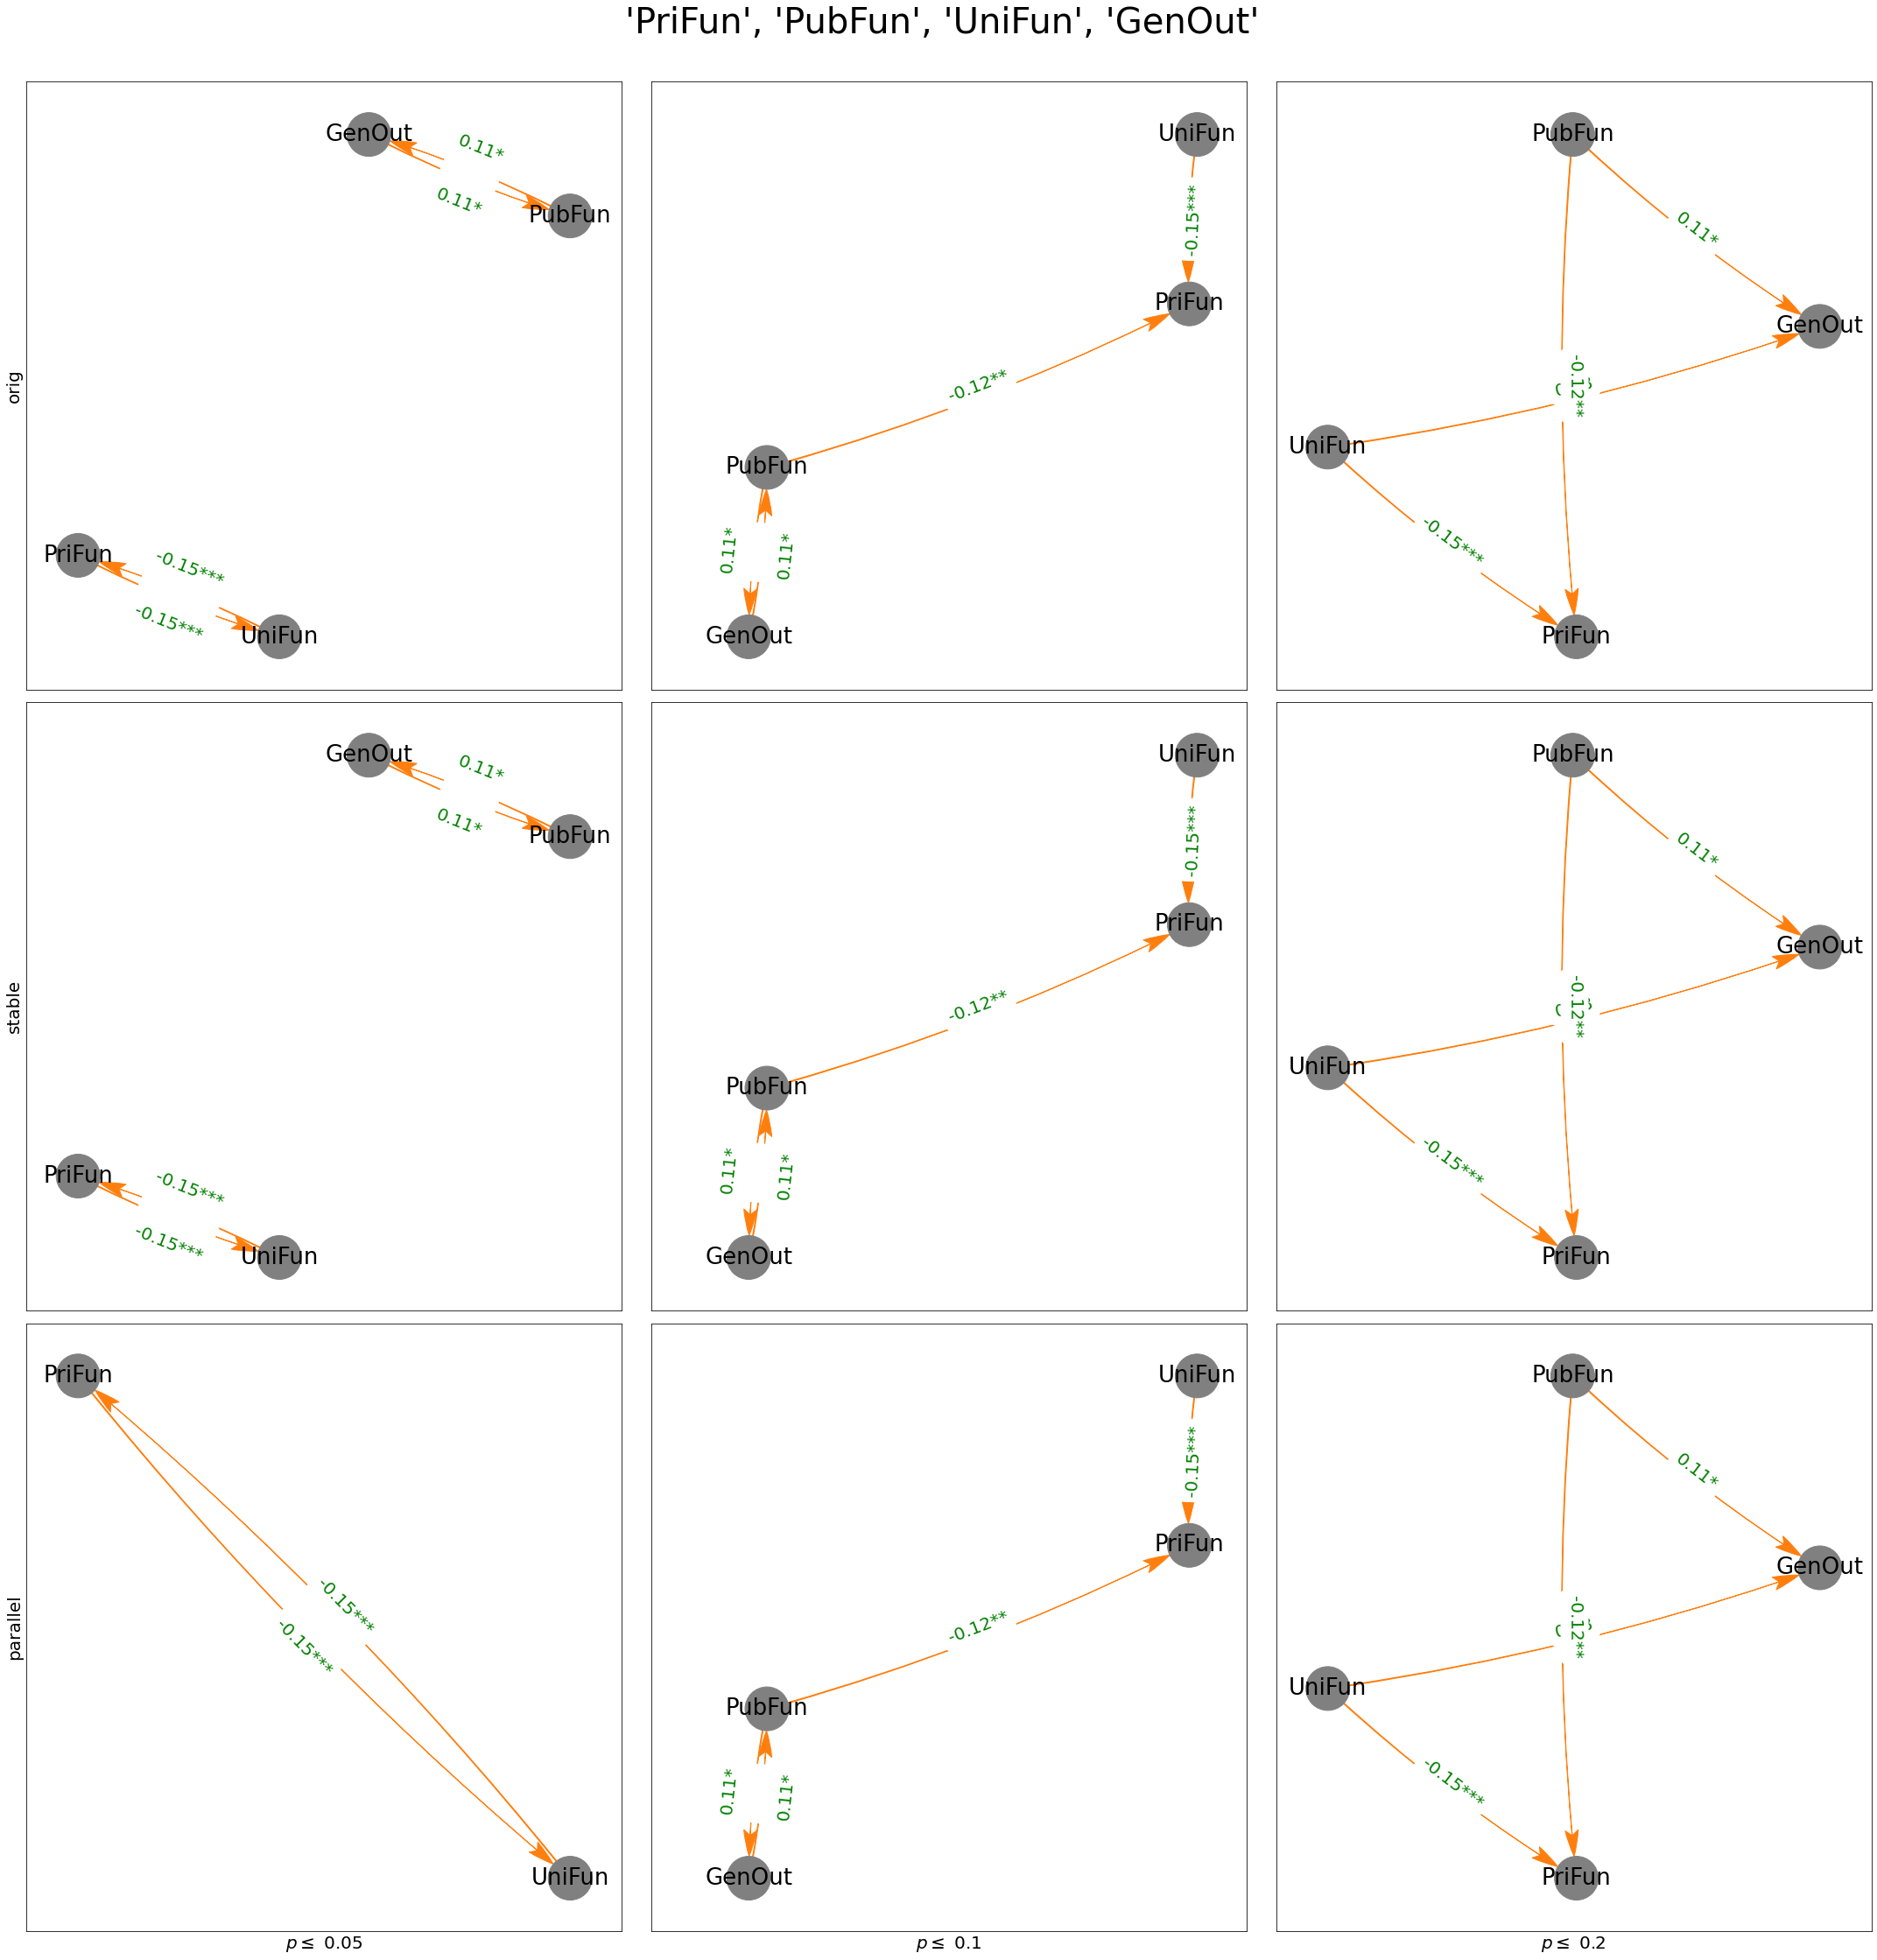

  0%|          | 0/2 [00:00<?, ?it/s]

{('PubAff', 'UniAff'): '-0.6***'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**', ('GenOut', 'PriAff'): '-0.24***'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**', ('GenOut', 'PriAff'): '-0.24***', ('PriAff', 'UniAff'): '-0.38***'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**', ('GenOut', 'PriAff'): '-0.24***', ('PriAff', 'UniAff'): '-0.38***'}


  0%|          | 0/2 [00:00<?, ?it/s]

{('PubAff', 'UniAff'): '-0.6***'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**', ('GenOut', 'PriAff'): '-0.24***'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**', ('GenOut', 'PriAff'): '-0.24***', ('PriAff', 'UniAff'): '-0.38***'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**', ('GenOut', 'PriAff'): '-0.24***', ('PriAff', 'UniAff'): '-0.38***'}


  0%|          | 0/2 [00:00<?, ?it/s]

{('PubAff', 'UniAff'): '-0.6***'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**', ('GenOut', 'PriAff'): '-0.24***'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**', ('GenOut', 'PriAff'): '-0.24***', ('PriAff', 'UniAff'): '-0.38***'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**', ('GenOut', 'PriAff'): '-0.24***', ('PriAff', 'UniAff'): '-0.38***'}


  0%|          | 0/2 [00:00<?, ?it/s]

{('PubAff', 'UniAff'): '-0.6***'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**', ('GenOut', 'PriAff'): '-0.24***'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**', ('GenOut', 'PriAff'): '-0.24***', ('PriAff', 'UniAff'): '-0.38***'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**', ('GenOut', 'PriAff'): '-0.24***', ('PriAff', 'UniAff'): '-0.38***'}


  0%|          | 0/2 [00:00<?, ?it/s]

{('PubAff', 'UniAff'): '-0.6***'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**', ('GenOut', 'PriAff'): '-0.24***'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**', ('GenOut', 'PriAff'): '-0.24***', ('PriAff', 'UniAff'): '-0.38***'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**', ('GenOut', 'PriAff'): '-0.24***', ('PriAff', 'UniAff'): '-0.38***'}


  0%|          | 0/2 [00:00<?, ?it/s]

{('PubAff', 'UniAff'): '-0.6***'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**', ('GenOut', 'PriAff'): '-0.24***'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**', ('GenOut', 'PriAff'): '-0.24***', ('PriAff', 'UniAff'): '-0.38***'}
{('PubAff', 'UniAff'): '-0.6***', ('PubAff', 'PriAff'): '-0.14**', ('GenOut', 'PriAff'): '-0.24***', ('PriAff', 'UniAff'): '-0.38***'}


  0%|          | 0/2 [00:00<?, ?it/s]

{('PubAff', 'PriAff'): '-0.32***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'UniAff'): '-0.6***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***', ('PriAff', 'GenOut'): '-0.22***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***', ('PriAff', 'GenOut'): '-0.22***', ('PriAff', 'PubAff'): '-0.31***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***', ('PriAff', 'GenOut'): '-0.22***', ('PriAff', 'PubAff'): '-0.31***', ('UniAff', 'PriAff'): '-0.36***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***', ('PriAff', 'GenOut'): '-0.22***', ('PriAff', 'PubAff'): '-0.31***', ('UniAff', 'PriAff'): '-0.36***', ('UniAff', 'PubAff'): '-0.6***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'U

  0%|          | 0/2 [00:00<?, ?it/s]

{('PubAff', 'PriAff'): '-0.32***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'UniAff'): '-0.6***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***', ('PriAff', 'GenOut'): '-0.22***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***', ('PriAff', 'GenOut'): '-0.22***', ('PriAff', 'PubAff'): '-0.31***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***', ('PriAff', 'GenOut'): '-0.22***', ('PriAff', 'PubAff'): '-0.31***', ('UniAff', 'PriAff'): '-0.36***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***', ('PriAff', 'GenOut'): '-0.22***', ('PriAff', 'PubAff'): '-0.31***', ('UniAff', 'PriAff'): '-0.36***', ('UniAff', 'PubAff'): '-0.6***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'U

  0%|          | 0/2 [00:00<?, ?it/s]

{('PubAff', 'PriAff'): '-0.32***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'UniAff'): '-0.6***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***', ('PriAff', 'GenOut'): '-0.22***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***', ('PriAff', 'GenOut'): '-0.22***', ('PriAff', 'PubAff'): '-0.31***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***', ('PriAff', 'GenOut'): '-0.22***', ('PriAff', 'PubAff'): '-0.31***', ('UniAff', 'PriAff'): '-0.36***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***', ('PriAff', 'GenOut'): '-0.22***', ('PriAff', 'PubAff'): '-0.31***', ('UniAff', 'PriAff'): '-0.36***', ('UniAff', 'PubAff'): '-0.6***'}
{('PubAff', 'PriAff'): '-0.32***', ('PubAff', 'U

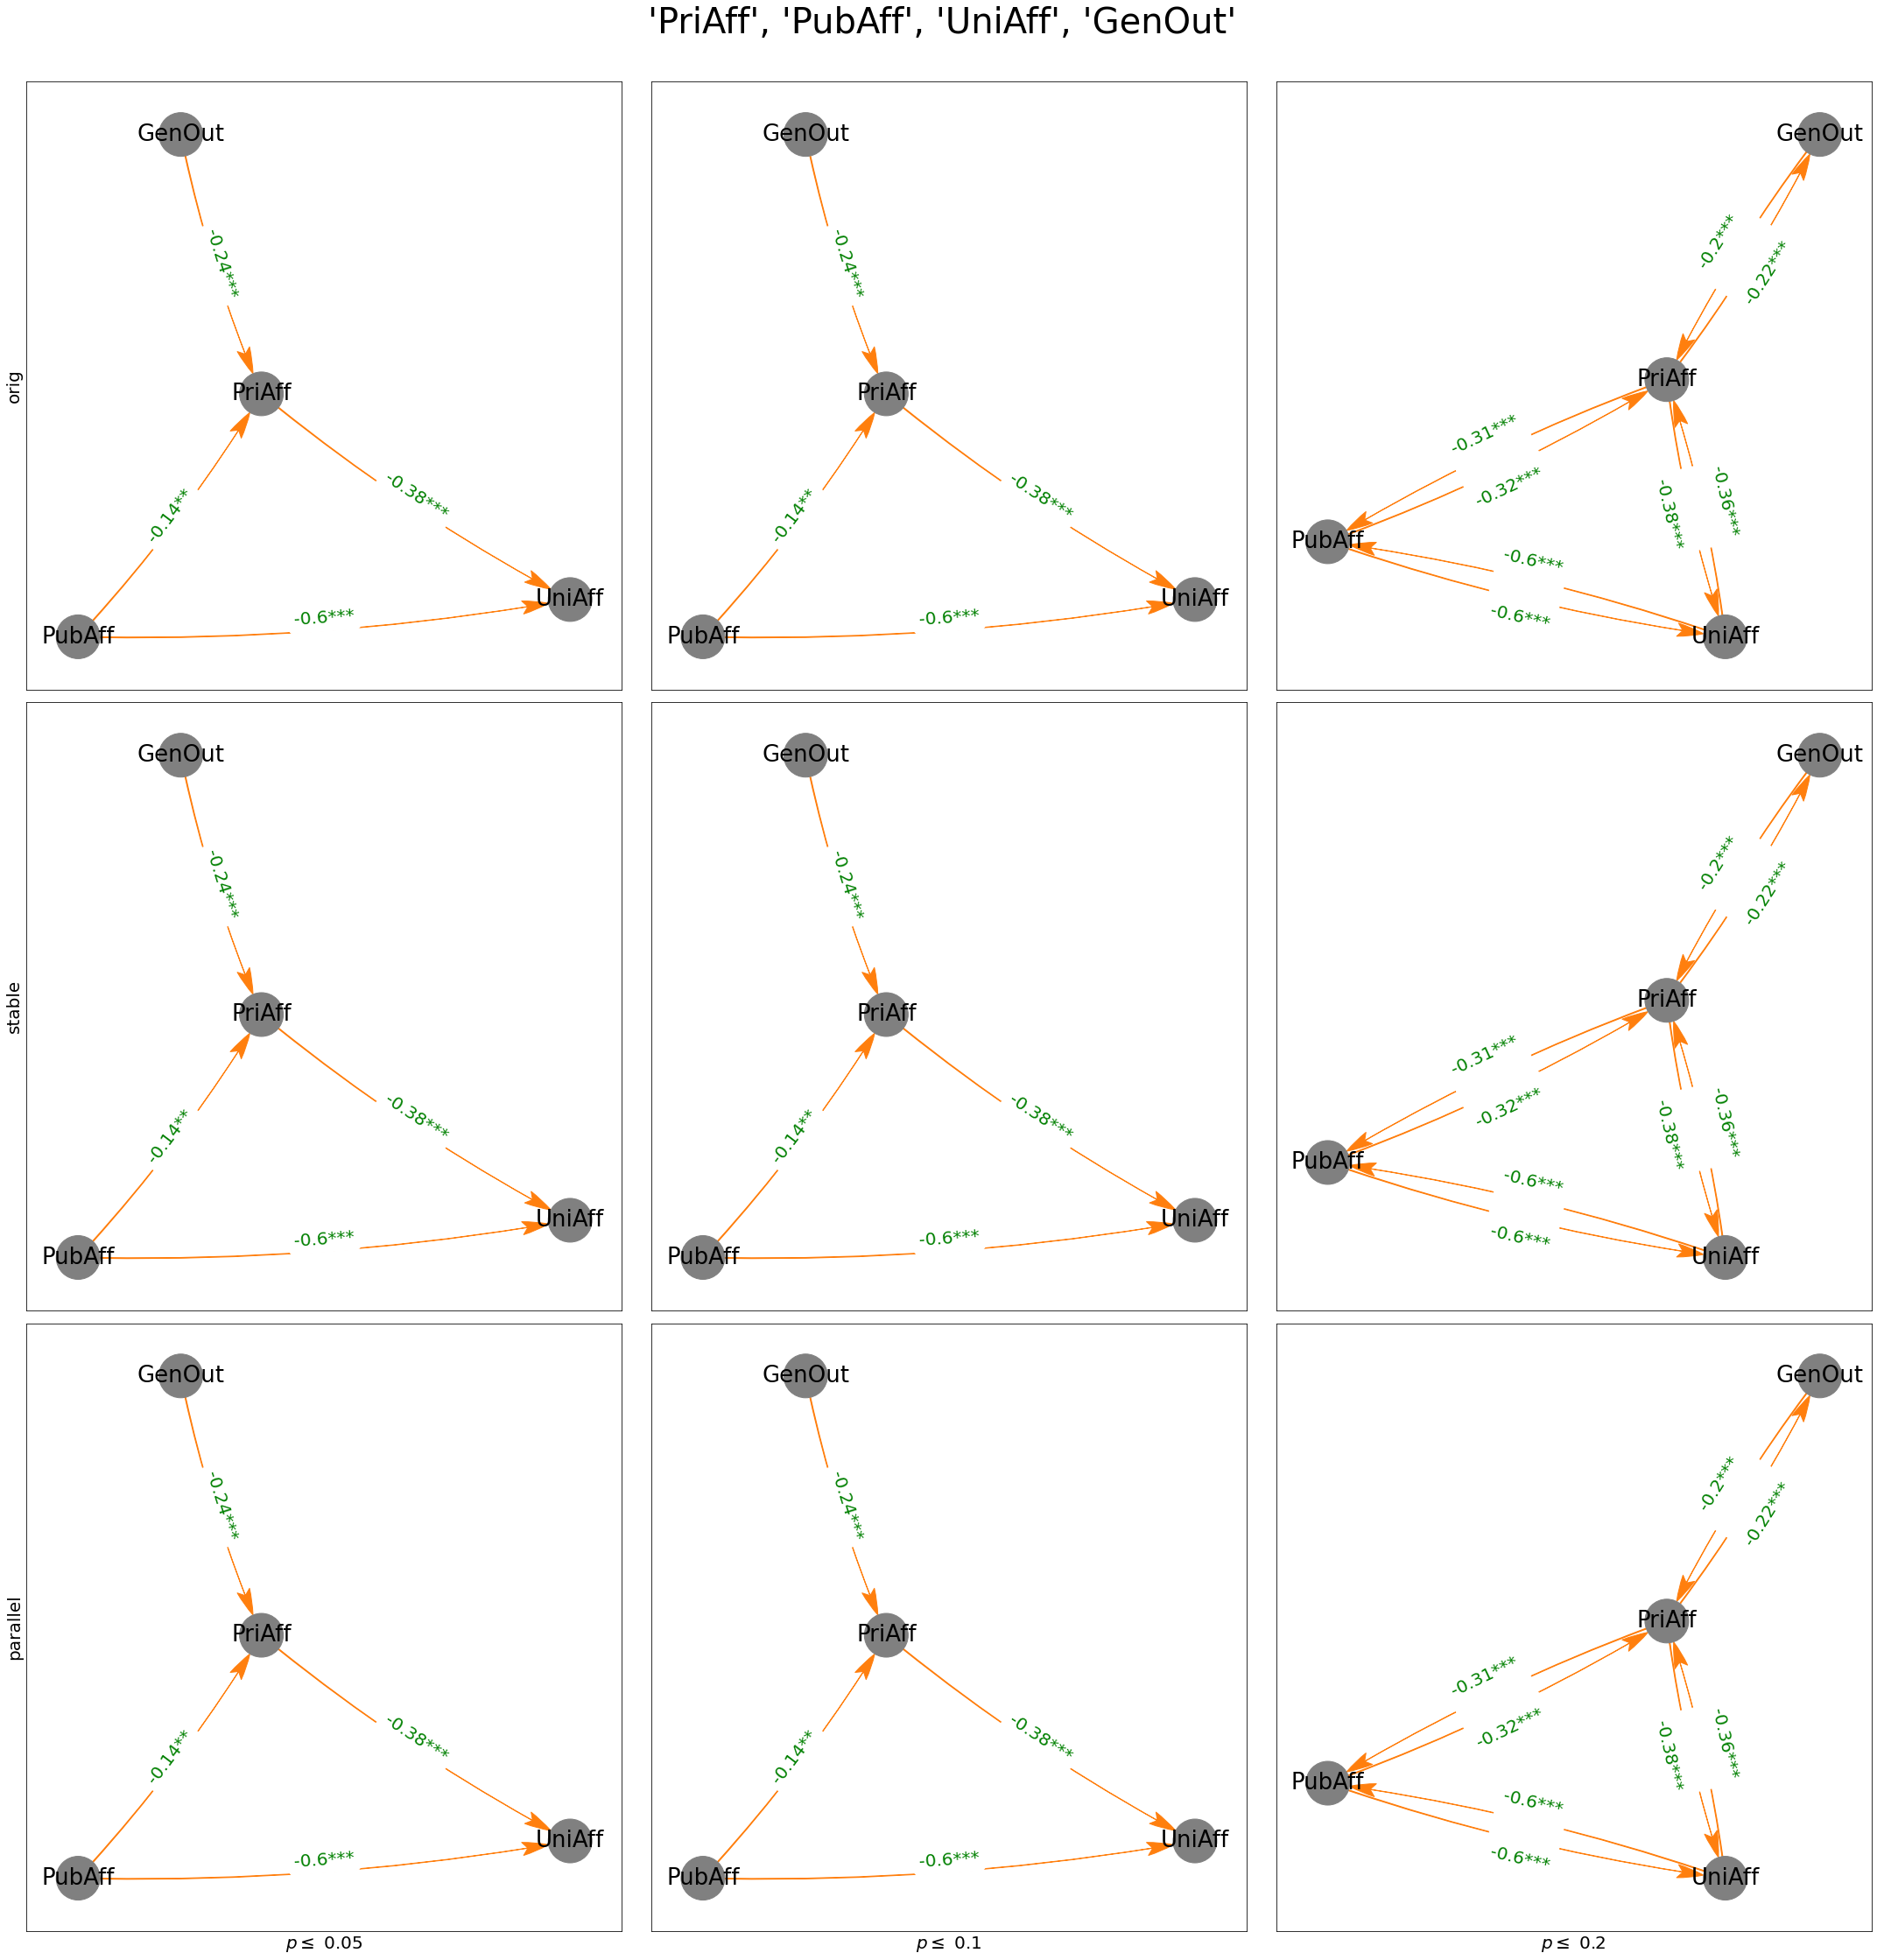

  0%|          | 0/5 [00:00<?, ?it/s]

{('GenOut', 'PriAff'): '-0.22***'}
{('GenOut', 'PriAff'): '-0.22***', ('PubFun', 'PubAff'): '0.11*'}
{('GenOut', 'PriAff'): '-0.22***', ('PubFun', 'PubAff'): '0.11*', ('UniFun', 'PriFun'): '-0.15***'}
{('GenOut', 'PriAff'): '-0.22***', ('PubFun', 'PubAff'): '0.11*', ('UniFun', 'PriFun'): '-0.15***'}


  0%|          | 0/5 [00:00<?, ?it/s]

{('GenOut', 'PriAff'): '-0.22***'}
{('GenOut', 'PriAff'): '-0.22***', ('PubFun', 'PubAff'): '0.11*'}
{('GenOut', 'PriAff'): '-0.22***', ('PubFun', 'PubAff'): '0.11*', ('UniFun', 'PriFun'): '-0.15***'}
{('GenOut', 'PriAff'): '-0.22***', ('PubFun', 'PubAff'): '0.11*', ('UniFun', 'PriFun'): '-0.15***'}


  0%|          | 0/5 [00:00<?, ?it/s]

{('GenOut', 'PriAff'): '-0.22***'}
{('GenOut', 'PriAff'): '-0.22***', ('PubAff', 'UniAff'): '-0.54***'}
{('GenOut', 'PriAff'): '-0.22***', ('PubAff', 'UniAff'): '-0.54***', ('UniFun', 'PriFun'): '-0.15***'}
{('GenOut', 'PriAff'): '-0.22***', ('PubAff', 'UniAff'): '-0.54***', ('UniFun', 'PriFun'): '-0.15***'}


  0%|          | 0/5 [00:00<?, ?it/s]

{('PubFun', 'PubAff'): '0.11*'}
{('PubFun', 'PubAff'): '0.11*', ('UniFun', 'PriFun'): '-0.15***'}
{('PubFun', 'PubAff'): '0.11*', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PriAff'): '-0.22***'}
{('PubFun', 'PubAff'): '0.11*', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PriAff'): '-0.22***', ('PriAff', 'GenOut'): '-0.22***'}
{('PubFun', 'PubAff'): '0.11*', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PriAff'): '-0.22***', ('PriAff', 'GenOut'): '-0.22***'}


  0%|          | 0/5 [00:00<?, ?it/s]

{('PubFun', 'PubAff'): '0.11*'}
{('PubFun', 'PubAff'): '0.11*', ('UniFun', 'PriFun'): '-0.15***'}
{('PubFun', 'PubAff'): '0.11*', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PriAff'): '-0.22***'}
{('PubFun', 'PubAff'): '0.11*', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PriAff'): '-0.22***', ('PriAff', 'GenOut'): '-0.22***'}
{('PubFun', 'PubAff'): '0.11*', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PriAff'): '-0.22***', ('PriAff', 'GenOut'): '-0.22***'}


  0%|          | 0/5 [00:00<?, ?it/s]

{('PubFun', 'PubAff'): '0.11*'}
{('PubFun', 'PubAff'): '0.11*', ('UniFun', 'PriFun'): '-0.15***'}
{('PubFun', 'PubAff'): '0.11*', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PriAff'): '-0.22***'}
{('PubFun', 'PubAff'): '0.11*', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PriAff'): '-0.22***', ('PriAff', 'GenOut'): '-0.22***'}
{('PubFun', 'PubAff'): '0.11*', ('UniFun', 'PriFun'): '-0.15***', ('GenOut', 'PriAff'): '-0.22***', ('PriAff', 'GenOut'): '-0.22***'}


  0%|          | 0/5 [00:00<?, ?it/s]

{('PriAff', 'UniAff'): '-0.25***'}
{('PriAff', 'UniAff'): '-0.25***', ('PriAff', 'PriFun'): '0.29***'}
{('PriAff', 'UniAff'): '-0.25***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***'}
{('PriAff', 'UniAff'): '-0.25***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('PubFun', 'PubAff'): '0.11*'}
{('PriAff', 'UniAff'): '-0.25***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('PubFun', 'PubAff'): '0.11*', ('GenOut', 'PriAff'): '-0.22***'}
{('PriAff', 'UniAff'): '-0.25***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('PubFun', 'PubAff'): '0.11*', ('GenOut', 'PriAff'): '-0.22***'}


  0%|          | 0/5 [00:00<?, ?it/s]

{('PriAff', 'UniAff'): '-0.25***'}
{('PriAff', 'UniAff'): '-0.25***', ('PriAff', 'PriFun'): '0.29***'}
{('PriAff', 'UniAff'): '-0.25***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***'}
{('PriAff', 'UniAff'): '-0.25***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('PubFun', 'PubAff'): '0.11*'}
{('PriAff', 'UniAff'): '-0.25***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('PubFun', 'PubAff'): '0.11*', ('GenOut', 'PriAff'): '-0.22***'}
{('PriAff', 'UniAff'): '-0.25***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('PubFun', 'PubAff'): '0.11*', ('GenOut', 'PriAff'): '-0.22***'}


  0%|          | 0/5 [00:00<?, ?it/s]

{('PubAff', 'UniAff'): '-0.6***'}
{('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***'}
{('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***', ('PriAff', 'PriFun'): '0.29***'}
{('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***'}
{('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('GenOut', 'PriAff'): '-0.22***'}
{('PubAff', 'UniAff'): '-0.6***', ('PriAff', 'UniAff'): '-0.38***', ('PriAff', 'PriFun'): '0.29***', ('PriAff', 'GenOut'): '-0.22***', ('GenOut', 'PriAff'): '-0.22***'}


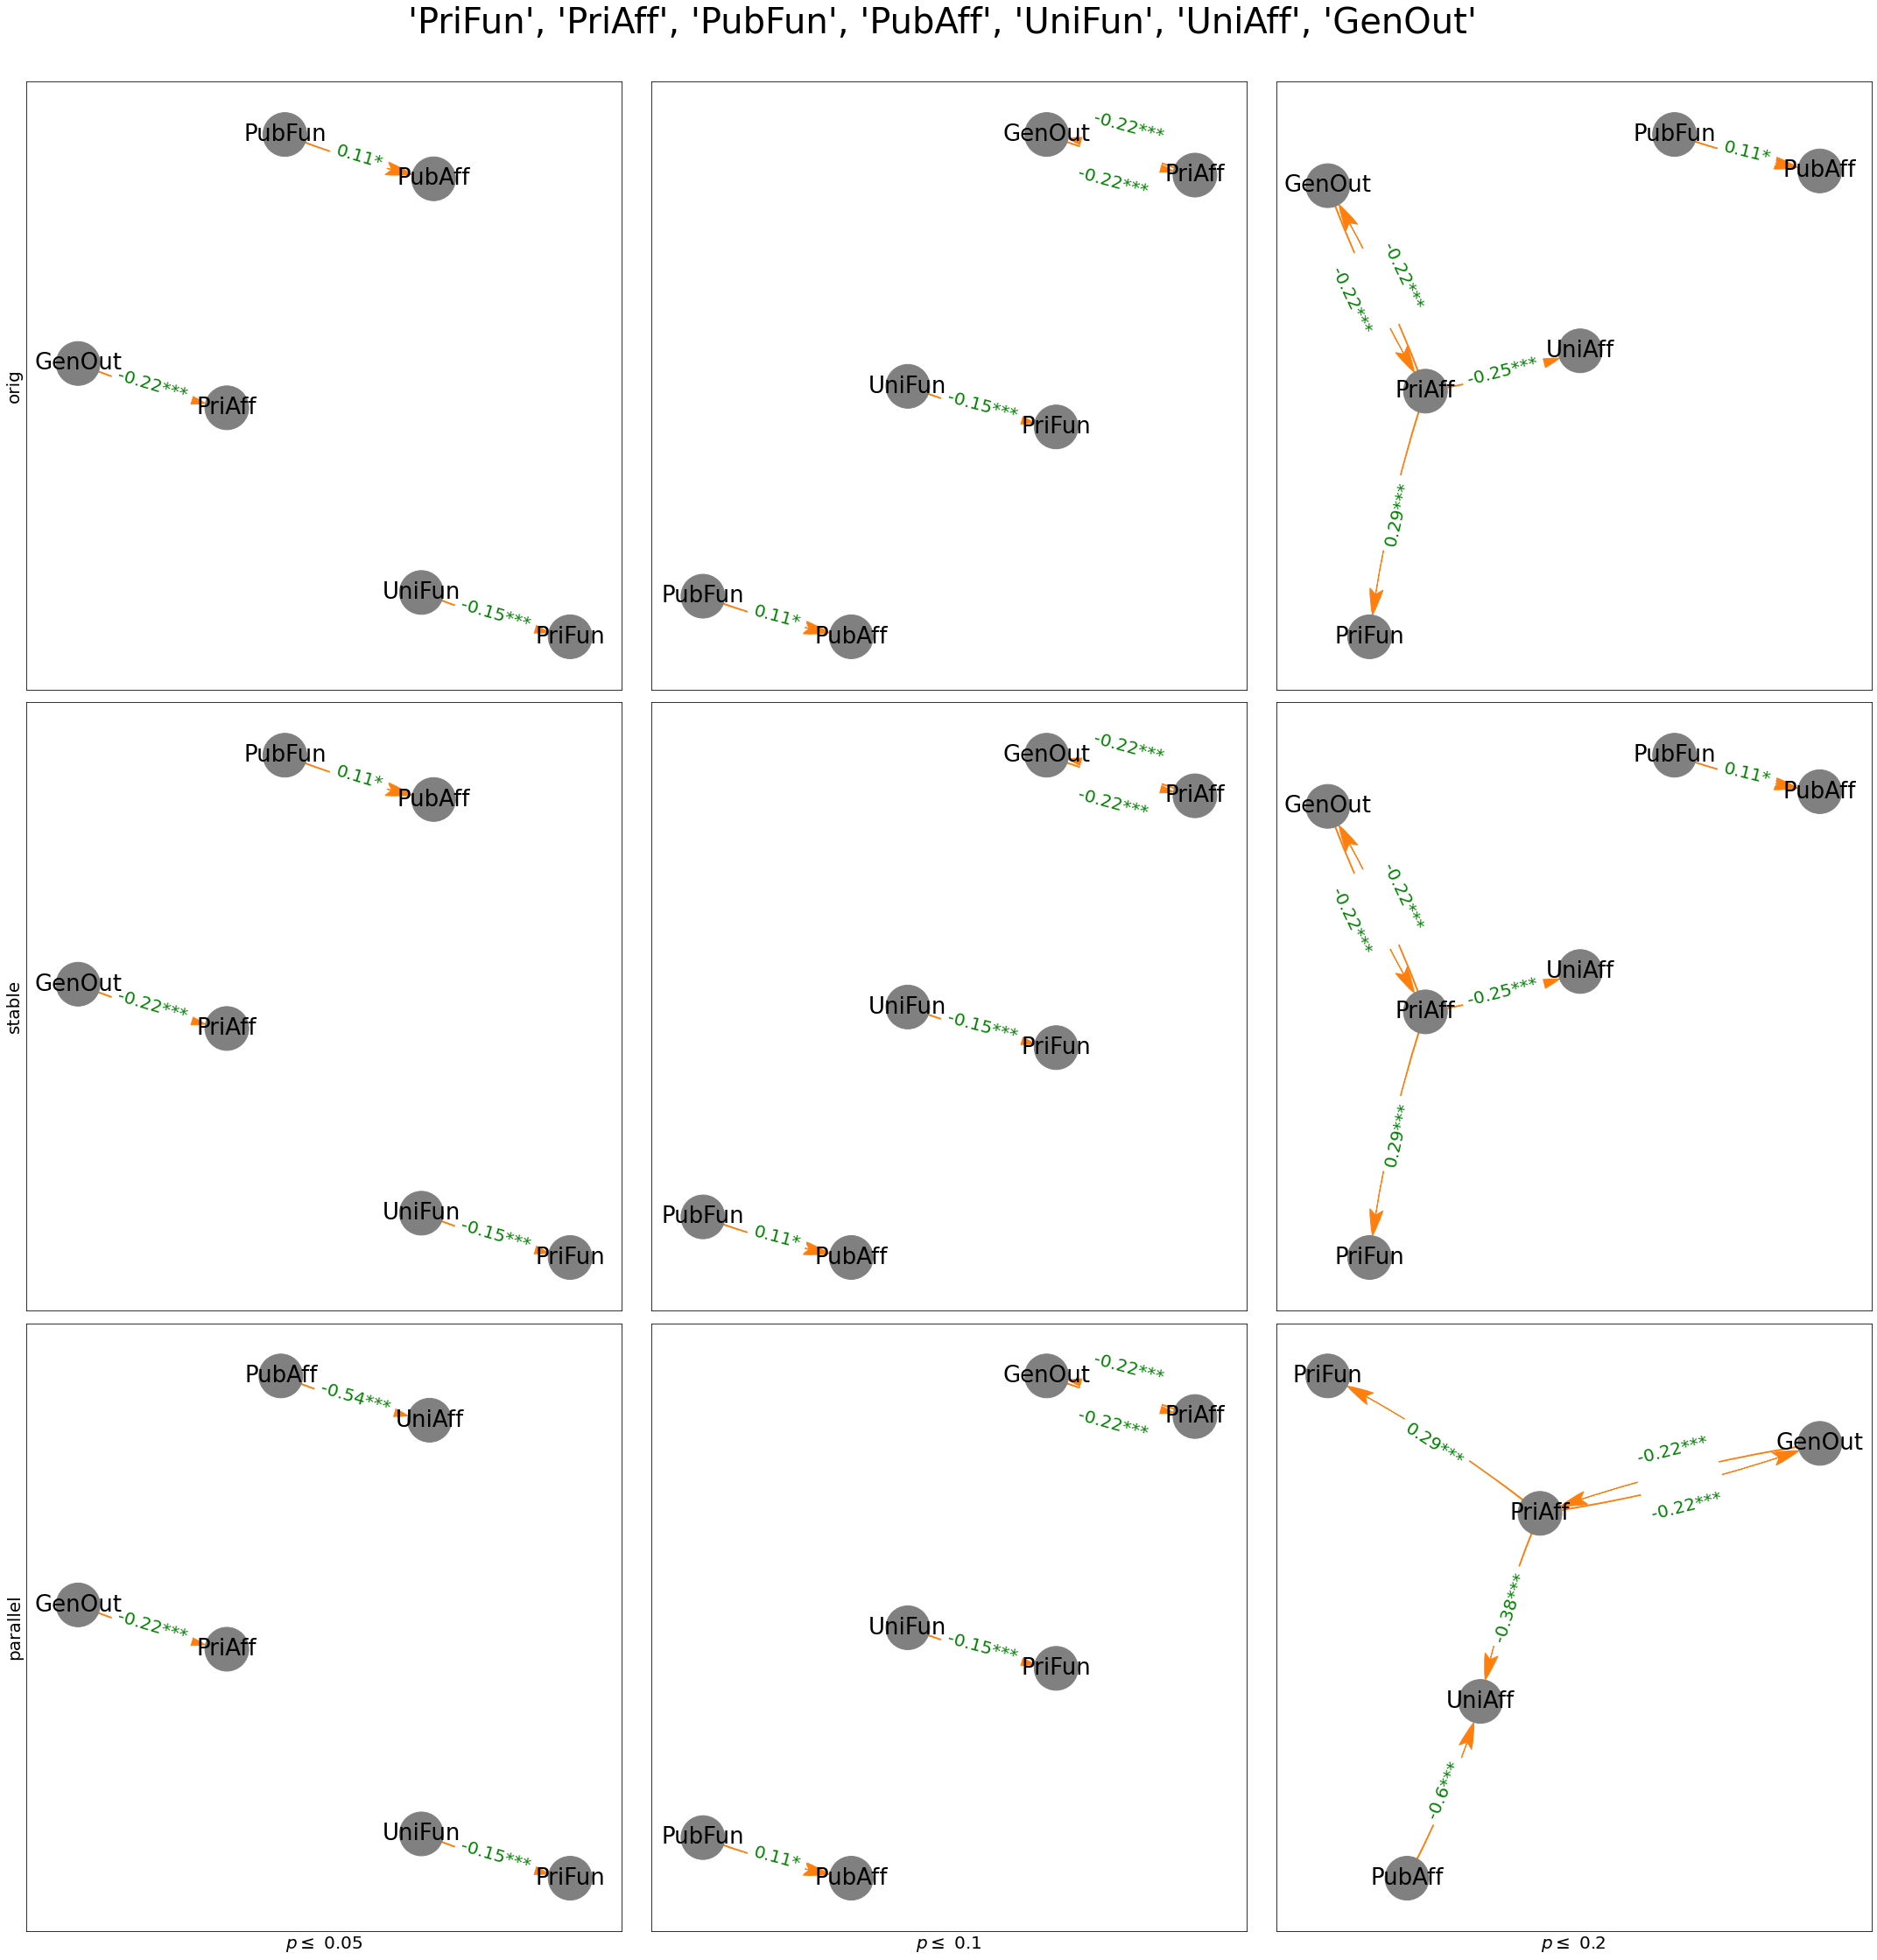

OutEdgeView([('PubAff', 'UniAff'), ('PriAff', 'UniAff'), ('PriAff', 'PriFun'), ('PriAff', 'GenOut'), ('GenOut', 'PriAff')])

In [5]:
import pingouin
from pgmpy.estimators import PC
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle
from networkx.drawing.nx_agraph import graphviz_layout
import warnings
warnings.filterwarnings("ignore")
from matplotlib.backends.backend_pdf import PdfPages
import networkx as nx


def firstLetterWord(str, num_chars = 3):
 
    result = ""
 
    # Traverse the string.
    v = True
    for i in range(len(str)):
         
        # If it is space, set v as true.
        if (str[i] == ' '):
            v = True
 
        # Else check if v is true or not.
        # If true, copy character in output
        # string and set v as false.
        elif (str[i] != ' ' and v == True):
            result += (str[i:i+num_chars])
            v = False
 
    return result

def graph_DAG(edges, data_reg, title = "", 
              fig = False, ax = False, 
              edge_labels = False,sig_vals = [0.05, 0.01, 0.001]):
    pcorr = data_reg.pcorr()
    graph = nx.DiGraph()
    def build_edge_labels(edges, df, sig_vals):
        edge_labels = {}
        for edge in edges:
            controls = [key for key in df.keys() if key not in edge]
            controls = list(set(controls))
            keep_controls = []
            for control in controls:
                control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0] ]
                if (control, edge[1]) in control_edges:
                    keep_controls.append(control)                
#             print(edge, keep_controls)
            pcorr = df.partial_corr(x = edge[0], y = edge[1], covar=keep_controls,
                                  method = "pearson")
            label = str(round(pcorr["r"][0],2))
            pvalue = pcorr["p-val"][0]
#             pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr()
#             label = pcorr[edge[0]].loc[edge[1]]

            for sig_val in sig_vals:
                if pvalue < sig_val: 
                    label = label + "*"   
            
            edge_labels[edge] = label
            print(edge_labels)
        return edge_labels
    
    if edge_labels == False:
        edge_labels = build_edge_labels(edges, 
                                        data_reg, 
                                        sig_vals=sig_vals) 
    print(edge_labels)   
    graph.add_edges_from(edges)
    color_map = ["grey" for g in graph]

    if fig == False and ax == False: fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = graphviz_layout(graph)

    edge_labels2 = []
    for u, v, d in graph.edges(data=True):
        if pos[u][0] > pos[v][0]:  
            if (v,u) in edge_labels.keys():
                edge_labels2.append(((u, v,), f'{edge_labels[u,v]}\n\n\n{edge_labels[(v,u)]}'))  
        if (v,u) not in edge_labels.keys():
            edge_labels2.append(((u,v,), f'{edge_labels[(u,v)]}'))
    edge_labels = dict(edge_labels2)

    nx.draw_networkx(graph, pos, node_color=color_map, node_size = 2500,
                     with_labels=True,  arrows=True,
                     font_color = "black",
                     font_size = 26, alpha = 1,
                     width = 1, edge_color = "C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"),
                     connectionstyle='arc3, rad = 0.05',
                     ax = a)
    nx.draw_networkx_edge_labels(graph,pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20,
                                ax = a)
    
    
pp = PdfPages("DAGOutputs.pdf")
DAG_models_vars = {0:["Private Funding", "Private Affiliation", "General Outcome"],
                  1:["Public Funding", "Public Affiliation", "General Outcome"],
                  2:["University Funding", "University Affiliation", "General Outcome"],
                  3:["Private Funding", "Public Funding", "University Funding", "General Outcome"],
                  4:["Private Affiliation", "Public Affiliation", "University Affiliation", "General Outcome"],
                  5:["Private Funding","Private Affiliation", "Public Funding","Public Affiliation", 
                     "University Funding", "University Affiliation", "General Outcome"],}
# link_sigs = [0.05, 0.1, 0.2]
link_sigs = [0.05, .1, .2]
algorithms = ["orig", "stable", "parallel"]
for keys in DAG_models_vars.values():
    fig, ax = plt.subplots(len(algorithms), len(link_sigs), figsize = (30,30))
    max_cond_vars = len(keys) - 2
    data_reg = data[keys].dropna()
    data_reg.rename(columns = {col:firstLetterWord(col) for col in keys}, inplace = True)
    keys = data_reg.keys()
    c = PC(data_reg[keys].dropna())
    max_cond_vars = len(keys) - 2
    i,j = 0,0
    for sig in link_sigs:
        for algorithm in algorithms:
            model = c.estimate(return_type = "pdag", variant = algorithm, 
                               significance_level = sig, 
                               max_cond_vars = max_cond_vars, ci_test = "chi_square")
            edges = model.edges()
            pcorr = data_reg.pcorr()
            weights = {}
            a = ax[i][j]
            graph_DAG(edges, data_reg, fig = fig, ax = a)
        
            if j == 0:
                a.set_ylabel(algorithm, fontsize = 20)
            if i == len(algorithms) - 1:
                a.set_xlabel("$p \leq$ "+ str(sig), fontsize = 20)
            i += 1
        j += 1
        i = 0
    plt.suptitle(str(list(keys)).replace("[","").replace("]",""), fontsize = 40, y =1.035)
    plt.show()
    pp.savefig(fig, bbox_inches = "tight")
    plt.close()
pp.close()
edges